In [1]:
# Imports
import pandas as pd
import durak
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
def play_multiple(num_games, verbose = False):

    strategies = {
        "player1" : "random",
        "player2" : "random",
        "player3" : "random"
    }

    knowledge_depths = {
        "player1" : 1,
        "player2" : 1,
        "player3" : 1
    }

    data = {}

    for i in range(num_games):
        model = durak.DurakModel(verbose=verbose)
        data["game" + str(i)] = durak.play(model)


    return data

In [3]:
data = play_multiple(1000, verbose= False)
df = pd.DataFrame.from_dict(data, orient="index")
df

,num_players,num_suits,num_cards_per_suit,num_starting_cards,durak,winners,player_strategies,player_depths
game0,3,3,3,1,2,"[0, 1]",[],[]
game1,3,3,3,1,0,"[1, 2]",[],[]
game2,3,3,3,1,1,"[2, 0]",[],[]
game3,3,3,3,1,2,"[0, 1]",[],[]
game4,3,3,3,1,1,"[2, 0]",[],[]
...,...,...,...,...,...,...,...,...
game995,3,3,3,1,1,"[2, 0]",[],[]
game996,3,3,3,1,0,"[1, 2]",[],[]
game997,3,3,3,1,0,"[2, 1]",[],[]
game998,3,3,3,1,2,"[0, 1]",[],[]


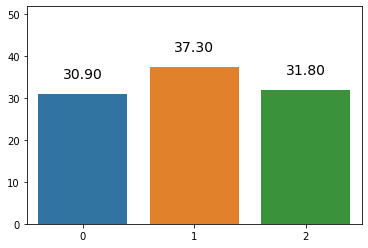

In [16]:
fig, ax = plt.subplots()
durak_percentages = [x/len(df)*100 for x in list(Counter(df["durak"]).values())]
players = df.durak.unique()

g = sns.barplot(x=players, y=durak_percentages, dodge=False)
ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 20),
                textcoords='offset points')
_ = g.set_ylim(0, p.get_height()+20) #To make space for the annotations

In [ ]:
# TODO: Influence of total number of cards on the effectiveness of depth?